In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *

%matplotlib inline
np.random.seed(1)

In [2]:
# Loading the data (signs)
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

y = 3


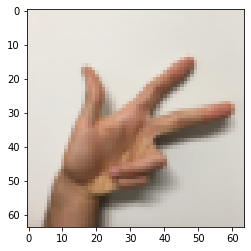

In [3]:
# Example of a picture
index = 32
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [4]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))
conv_layers = {}

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


In [5]:
def create_model(InputShape):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED
    Args:
    InputShape : Shape of image
    
    returns Model:Tf keras model
    """
    
    input_sh = tf.keras.Input(shape = InputShape)
    X = tf.keras.layers.Conv2D(8, (4, 4), strides = 1,padding = 'same', activation='relu')(input_sh)
    P1 =  tf.keras.layers.MaxPool2D((8,8), strides = 8, padding = 'same')(X)
    Z2 = tf.keras.layers.Conv2D(16, (2,2),strides = 1, padding = 'same', activation='relu')(P1)
    P2 = tf.keras.layers.MaxPool2D((4,4), strides = 4, padding = 'same')(Z2)
    F = tf.keras.layers.Flatten()(P2)
    Z3 = tf.keras.layers.Dense(units = 6, activation = 'softmax')(F)
    model = tf.keras.Model(inputs=input_sh, outputs=Z3)

    return model


In [6]:
conv_model = create_model((64, 64, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 8)         392       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          528       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                

In [7]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
17/17 [==============================] - 3s 166ms/step - loss: 1.7973 - accuracy: 0.1778 - val_loss: 1.7880 - val_accuracy: 0.2583
Epoch 2/100
17/17 [==============================] - 3s 164ms/step - loss: 1.7818 - accuracy: 0.2463 - val_loss: 1.7779 - val_accuracy: 0.2917
Epoch 3/100
17/17 [==============================] - 2s 125ms/step - loss: 1.7729 - accuracy: 0.2907 - val_loss: 1.7701 - val_accuracy: 0.3083
Epoch 4/100
17/17 [==============================] - 2s 121ms/step - loss: 1.7661 - accuracy: 0.3269 - val_loss: 1.7632 - val_accuracy: 0.3333
Epoch 5/100
17/17 [==============================] - 2s 132ms/step - loss: 1.7581 - accuracy: 0.3407 - val_loss: 1.7542 - val_accuracy: 0.3417
Epoch 6/100
17/17 [==============================] - 2s 133ms/step - loss: 1.7480 - accuracy: 0.3880 - val_loss: 1.7425 - val_accuracy: 0.4083
Epoch 7/100
17/17 [==============================] - 2s 110ms/step - loss: 1.7341 - accuracy: 0.4009 - val_loss: 1.7280 - val_accuracy: 0.4167

17/17 [==============================] - 1s 85ms/step - loss: 0.6309 - accuracy: 0.8009 - val_loss: 0.7334 - val_accuracy: 0.7250
Epoch 59/100
17/17 [==============================] - 1s 82ms/step - loss: 0.6229 - accuracy: 0.8009 - val_loss: 0.7264 - val_accuracy: 0.7250
Epoch 60/100
17/17 [==============================] - 1s 83ms/step - loss: 0.6157 - accuracy: 0.8037 - val_loss: 0.7197 - val_accuracy: 0.7333
Epoch 61/100
17/17 [==============================] - 1s 85ms/step - loss: 0.6080 - accuracy: 0.8065 - val_loss: 0.7128 - val_accuracy: 0.7333
Epoch 62/100
17/17 [==============================] - 1s 86ms/step - loss: 0.6005 - accuracy: 0.8102 - val_loss: 0.7056 - val_accuracy: 0.7417
Epoch 63/100
17/17 [==============================] - 2s 91ms/step - loss: 0.5936 - accuracy: 0.8111 - val_loss: 0.6994 - val_accuracy: 0.7417
Epoch 64/100
17/17 [==============================] - 1s 85ms/step - loss: 0.5865 - accuracy: 0.8194 - val_loss: 0.6936 - val_accuracy: 0.7500
Epoch 65/100

F:\Electrical\4 Communications\Handasa\Graduation Project\3.6.8\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

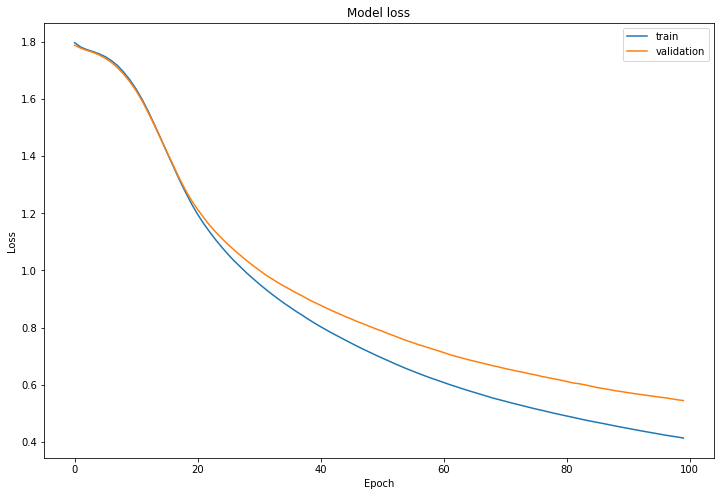

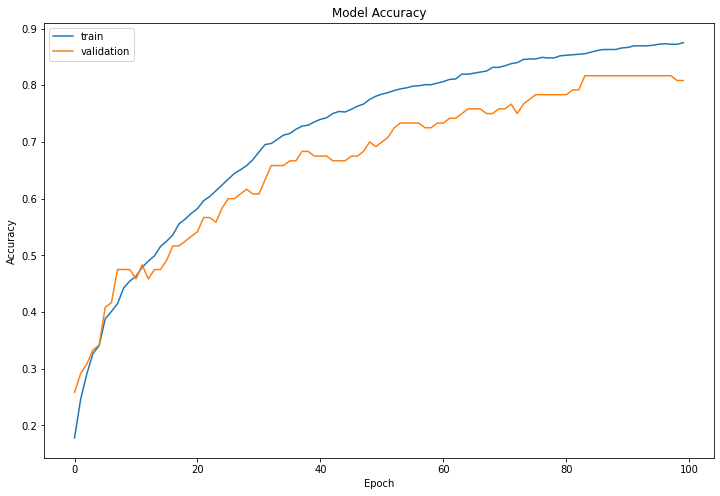

In [8]:
# The history.history["loss"] entry is a dictionary with as many values as epochs that the
# model was trained on. 
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')

In [ ]:
fname = "images/thumbs_up.jpg"
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(64,64))
plt.imshow(my_image)